# Découvrez l’algorithme k-means

## Fonctionnement de l'algorithme

Soit k le nombre de clusters.

**Objectif** : Trouver des groupes en faisant en sorte de minimiser `l'interie intraclasse` .

L'algorithme travaille avec des centroïde or on ne connait pas initialement k.

1. On choisit k .

2. On choisi donc des centroïdes au hasard parmis les points du nuage de point.

3. On attribue ensuite à chaque point le groupe du centroïde le plus proche : **on obtient une partition**.

4. On calcule un nouveau centroïde pour chaque groupe.

5. Comme le centroïde a bougé on revient à **l'etape 3**.

On continue jusqu'a la convergence de l'algorithme : `quand plus rien ne bouge d'une itération à l'autre` , c'est à dire quand le centroïde reste immobile après **l'étape 3**.

## Avantages et inconvénients du k-means

- L'algorithme converge rapidement

- Le résultat dépend de l'initialisation des centroïdes.

- Cet algorithme est dit non-déterministe car le résultat peut varier suivant une variable qui est elle liée au hasard.

- Le k-means n'est pas capable de déterminer le nombre de clusters optimal.

**note** : Si on ne distingue pas clairement les clusters au début le k-means serait toujours capable de partitionner les données .

## Le nom de cluster

Pour trouver le k optimal , on relance l'algorithme plusieurs fois avec différentes valeurs de k en notant l'inertie intraclasse obtenue.

Quand k augmente -> plus de clusters -> clusters plus resserés : l'inertie intraclasse augmente et inversement.

Pour déterminer k , on s'interesse au graphique de l'inertie intraclasse en fonction du nombre de cluster.On cherche une cassure dans la courbe qui nous servira de seuil.

**exemple** :
![Graphique Inertie N_clusters](../assets/inertia_n_cluster.png)

Ici on pourrait retenir 2 ou 3 , mais nous nous baserons sur deux solutions pour notre choix :

- Le nombre de cluster pour lequel nous considérons que la cassure est la dernière qui est **forte** : Ici 3 .

- Prendre le k de la première solution , le k avant et le k après : Ici 2 , **3** et  4 , et d'analyser les clusters obtenus pour choisir le k le plus pertient pour la suite.


# Pratique

In [1]:
# Importons nos librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets


In [2]:
# On charge le dataset
iris = datasets.load_iris()

# On extrait X
X = iris.data

# Transformation en dataframe
X = pd.DataFrame(X)

# Affichage d'un extrait
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# liste vide pour enregistrer les inerties
inertia_list = []

# liste de nombres de clusters
k_list = list(range(1,10))

# Pour chaque nombre de clusters
for k in k_list:

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)

    # on entraine
    kmeans.fit(X)

    # On enregistre l'inertie obtenue
    inertia_list.append(kmeans.inertia_)




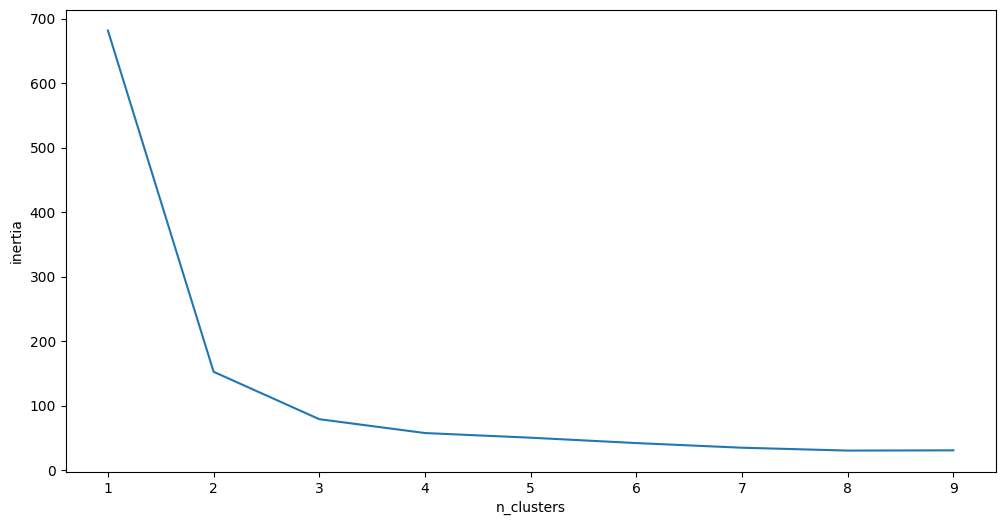

In [7]:
# Graphique

fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("inertia")
ax.set_xlabel("n_clusters")
ax = plt.plot(k_list,inertia_list)